In [1]:
# from google.colab import drive
# drive.mount( '/content/drive/' )

In [54]:
import time
import io
import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
import pickle
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from matplotlib.colors import Normalize

In [55]:
path_to_dataset = 'output/'
df = pd.read_csv( path_to_dataset + "2020_05_02_08_19_22_PM_metrics" )
df = df.T

# The transpose of the dataframe is taken. And the header of the first row is used as the new headers of the dataframe

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [56]:
def make_float( string ):
    try:
        digits = float (''.join(ch for ch in string.split(",")[1] if ch.isdigit() or ch == '.'))
        return digits
    except:
        return np.nan

In [57]:
# Make the Y vector
# Change the df field note according changes might be needed in the make_float function

Y = df["microservices_demo_user_request_latency_microseconds"] 
Y = np.array( Y )[ : , 2  ] # 2 because the second column has the 99 percentile latency
Y_float = [ make_float(y) for y in Y[ :  ] ]

Y_float = pd.Series( Y_float )
Y_float = Y_float.dropna()
Y_float = Y_float.iloc[:-1]

In [58]:
# Make X
list_of_features = [ "gc_g1_old_generation_count" , "gc_g1_young_generation_count" , "go_gc_duration_seconds" ,
                    "go_memstats_heap_alloc_bytes" , "go_memstats_heap_inuse_bytes",
                   "go_memstats_last_gc_time_seconds" , "go_memstats_mallocs_total" , "go_memstats_stack_inuse_bytes" , "heap_used" , "httpsessions_active" , 
                   "jvm_classes_loaded" , "jvm_gc_collection_seconds_count" , "jvm_memory_bytes_committed" ,
                   "jvm_memory_bytes_max" , "jvm_memory_bytes_used" , "jvm_memory_pool_bytes_committed" , 
                   "jvm_memory_pool_bytes_max" , "jvm_memory_pool_bytes_used" , "microservices_demo_user_request_count",
                   "nodejs_heap_size_used_bytes"]

final_list_of_features = []
X = pd.DataFrame()
for feature in list_of_features:
    df2 = df[ feature ]
    feature_array = np.array(df2)
#     print(feature)
    if len(df2.shape) == 2:
        for i in range( df2.shape[1] ):
            x_feature = feature_array[ : , i ]
            x_feature_float = [ make_float(x) for x in x_feature[ : ] ]
            X[ feature + str( i ) ] = x_feature_float
            final_list_of_features.append( feature + str( i ) )
    else:
        x_feature = feature_array
        x_feature_float = [ make_float(x) for x in x_feature[ : ] ]
        X[ feature + str( i ) ] = x_feature_float
        final_list_of_features.append( feature + str( i ) )
        
X.dtypes
X.astype(float)
# X.astype(object).convert_objects()
# X.to_csv('out.csv')
X = X.dropna()
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit_transform(X)
X = X.iloc[:-2]
X

,gc_g1_old_generation_count0,gc_g1_old_generation_count1,gc_g1_old_generation_count2,gc_g1_young_generation_count0,gc_g1_young_generation_count1,gc_g1_young_generation_count2,go_gc_duration_seconds0,go_gc_duration_seconds1,go_gc_duration_seconds2,go_gc_duration_seconds3,...,jvm_memory_pool_bytes_used13,jvm_memory_pool_bytes_used14,jvm_memory_pool_bytes_used15,jvm_memory_pool_bytes_used16,jvm_memory_pool_bytes_used17,microservices_demo_user_request_count0,microservices_demo_user_request_count1,microservices_demo_user_request_count2,microservices_demo_user_request_count3,nodejs_heap_size_used_bytes3
0,0.0,0.0,0.0,1328.0,994.0,224.0,0.000128,0.000271,0.000562,0.001362,...,5140184.0,46137344.0,48558832.0,1048576.0,44476808.0,70972.0,70972.0,284000.0,74477.0,29094048.0
1,0.0,0.0,0.0,1329.0,995.0,224.0,0.000128,0.000271,0.000562,0.001362,...,5140184.0,52428800.0,48558832.0,1048576.0,44476808.0,71025.0,71025.0,284212.0,74528.0,29094048.0
2,0.0,0.0,0.0,1330.0,996.0,224.0,0.000128,0.000272,0.000563,0.001451,...,5140184.0,58720256.0,48558832.0,1048576.0,44476808.0,71062.0,71062.0,284357.0,74563.0,34366456.0
3,0.0,0.0,0.0,1331.0,996.0,224.0,0.000128,0.000272,0.000563,0.001362,...,5140184.0,61865984.0,48558832.0,1048576.0,44476808.0,71102.0,71102.0,284520.0,74614.0,34366456.0
4,0.0,0.0,0.0,1331.0,997.0,225.0,0.000128,0.000272,0.000563,0.001294,...,5140184.0,4194304.0,48588048.0,1048576.0,44476808.0,71155.0,71155.0,284730.0,74670.0,39586736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.0,0.0,0.0,2294.0,1652.0,324.0,0.000128,0.000563,0.001618,0.005656,...,5140184.0,49283072.0,48721360.0,1048576.0,44490264.0,121859.0,121859.0,487554.0,128092.0,56175344.0
1017,0.0,0.0,0.0,2295.0,1652.0,324.0,0.000128,0.000568,0.001618,0.005656,...,5140184.0,55574528.0,48721360.0,1048576.0,44490264.0,121908.0,121908.0,487762.0,128143.0,56175344.0
1018,0.0,0.0,0.0,2296.0,1653.0,324.0,0.000128,0.000563,0.001618,0.005656,...,5140184.0,61865984.0,48721360.0,1048576.0,44490264.0,121957.0,121957.0,487961.0,128190.0,51416000.0
1019,0.0,0.0,0.0,2296.0,1653.0,325.0,0.000128,0.000568,0.001618,0.005656,...,5140184.0,4194304.0,48562032.0,1048576.0,44490264.0,122010.0,122010.0,488158.0,128243.0,51416000.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split( X, Y_float , test_size=0.33, random_state=42)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform( X_test )

# DO NOT USE FOR 5710 BELOW THIS LINE

In [65]:
y_train = y_train - np.mean(y_train) > 0
y_train = np.array( y_train , dtype = np.int )
y_test = y_test - np.mean(y_test) > 0
y_test = np.array( y_test , dtype = np.int )

Feature ranking:
1. go_gc_duration_seconds12 (0.049928)
2. go_gc_duration_seconds10 (0.031089)
3. go_memstats_last_gc_time_seconds2 (0.028202)
4. go_gc_duration_seconds13 (0.027320)
5. jvm_memory_bytes_used4 (0.026847)
6. go_gc_duration_seconds5 (0.026453)
7. gc_g1_young_generation_count0 (0.026272)
8. go_gc_duration_seconds3 (0.025984)
9. go_memstats_mallocs_total2 (0.025662)
10. jvm_memory_pool_bytes_used6 (0.025459)
11. jvm_gc_collection_seconds_count3 (0.024738)
12. go_memstats_last_gc_time_seconds1 (0.024564)
13. microservices_demo_user_request_count2 (0.024435)
14. jvm_gc_collection_seconds_count5 (0.024423)
15. go_memstats_last_gc_time_seconds0 (0.023998)
16. go_memstats_mallocs_total1 (0.023995)
17. microservices_demo_user_request_count0 (0.023988)
18. microservices_demo_user_request_count3 (0.023874)
19. microservices_demo_user_request_count1 (0.023547)
20. go_memstats_mallocs_total0 (0.023307)
21. go_gc_duration_seconds9 (0.023202)
22. go_gc_duration_seconds11 (0.023113)
23. 

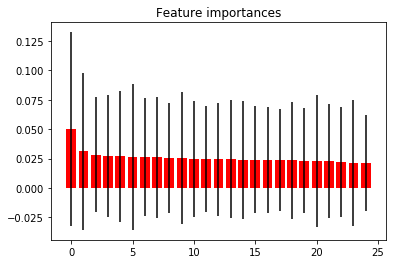

In [68]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=0)

forest.fit(X_train , y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:25]
# importances = importances[:5
# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, final_list_of_features[indices[f]] , importances[indices[f]] ))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
plt.show()

In [41]:
# Make New X with the selected features
X


array([[-3.50560359,  0.08432448,  2.96156387, ...,  0.62829353,
         1.44494228,  0.97602747],
       [-2.64918176, -0.41074554, -1.58732781, ..., -1.5094459 ,
         0.3010693 ,  0.37584699],
       [-1.50874584, -1.82411799, -2.46000384, ...,  1.03647276,
         0.15811146,  0.67165818],
       ...,
       [ 0.62625723, -1.07482811,  0.31131904, ..., -1.28896975,
        -1.08910857,  0.67431109],
       [ 1.81283965, -0.10732787, -0.86661416, ...,  0.15952958,
        -0.81493735, -0.43583264],
       [-0.1871246 , -2.46730267, -1.95576698, ...,  0.48702003,
         0.81944475,  0.86779542]])

In [12]:
clf = LogisticRegression(C=1,
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1)
# Train the classifier
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Test score with L1 penalty: %.4f" % score)
#Evaluate the classifier
# score = clf.score(X_val ,  y_val)
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 0.9751
Test score with L1 penalty: 0.9751


In [13]:
clf = SVC(kernel = 'rbf' , C = 100 , gamma = 100)
# Train the classifier
clf.fit(X_train, y_train.flatten())
score = clf.score(X_train , y_train)
print("Test score with L1 penalty: %.4f" % score)
# score = clf.score(x_val, y_val.flatten())
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 1.0000
Test score with L1 penalty: 1.0000


In [14]:
score = clf.score(X_test, y_test.flatten())
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 0.5074
